# CNN chalenge

In this exercise, you will build a CNN to classify images from the Fashion MNIST dataset, train the model, evaluate its performance, and visualize predictions with a confusion matrix.

## Prepare the data

Load the Fashion MNIST dataset using Keras and display the first few images

---

with their labels to get a sense of the data.

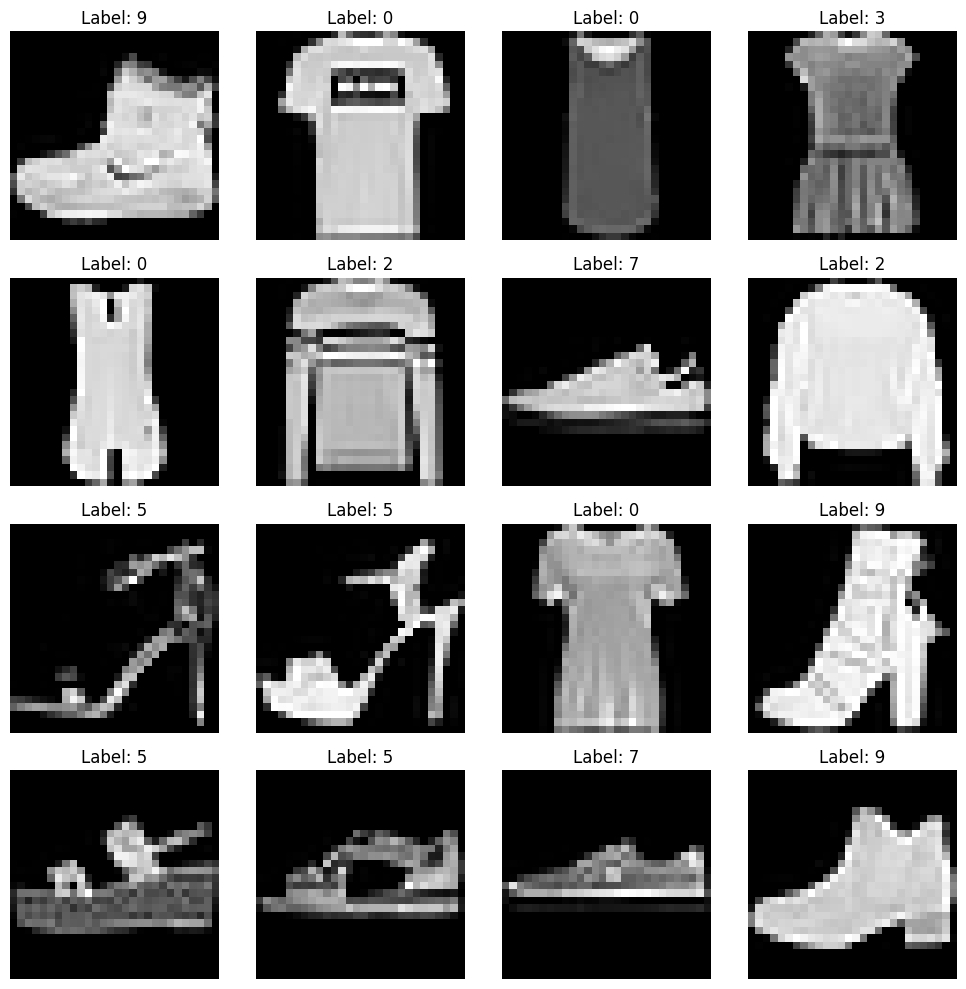

In [2]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Your code here
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



*Visualize* 5 random images from the training set with their labels.

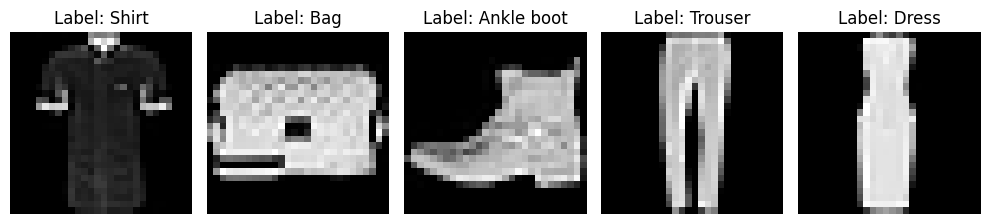

In [3]:
# Your code here for visualization
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

label_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

random_indices = np.random.choice(x_train.shape[0], 5, replace=False)

plt.figure(figsize=(10, 5))
for i, index in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[index], cmap="gray")
    plt.title(f"Label: {label_names[y_train[index]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


Reshape the data to include a channel dimension and confirm the new shape.

In [4]:
# Task: Reshape x_train and x_test to include the channel dimension
# Your code here
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"New shape of x_train: {x_train.shape}")
print(f"New shape of x_test: {x_test.shape}")


New shape of x_train: (60000, 28, 28, 1)
New shape of x_test: (10000, 28, 28, 1)


## Build the CNN model

Create a CNN with at least two convolutional layers, followed by max pooling layers, and a dense output layer.

Rememeber the `Conv2D`, `MaxPooling2D`, `Flatten`, `Dropout` and `Dense`layers.

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile your model with an appropriate optimizer, loss function, and metric.

In [7]:
# Task: Compile your model
# Your code here
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Train your model using model.fit(), setting a validation split of 20% and training for at least 10 epochs.

In [8]:
# Task: Train the model and store the training history in a variable
# Your code here
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=2
)


Epoch 1/10
1500/1500 - 46s - 31ms/step - accuracy: 0.7530 - loss: 0.7875 - val_accuracy: 0.8443 - val_loss: 0.4197
Epoch 2/10
1500/1500 - 82s - 54ms/step - accuracy: 0.8294 - loss: 0.4678 - val_accuracy: 0.8682 - val_loss: 0.3595
Epoch 3/10
1500/1500 - 44s - 29ms/step - accuracy: 0.8511 - loss: 0.4051 - val_accuracy: 0.8717 - val_loss: 0.3411
Epoch 4/10
1500/1500 - 82s - 54ms/step - accuracy: 0.8650 - loss: 0.3716 - val_accuracy: 0.8812 - val_loss: 0.3151
Epoch 5/10
1500/1500 - 44s - 29ms/step - accuracy: 0.8725 - loss: 0.3483 - val_accuracy: 0.8726 - val_loss: 0.3369
Epoch 6/10
1500/1500 - 82s - 54ms/step - accuracy: 0.8790 - loss: 0.3311 - val_accuracy: 0.8873 - val_loss: 0.3101
Epoch 7/10
1500/1500 - 82s - 54ms/step - accuracy: 0.8819 - loss: 0.3171 - val_accuracy: 0.8909 - val_loss: 0.2971
Epoch 8/10
1500/1500 - 83s - 55ms/step - accuracy: 0.8868 - loss: 0.3045 - val_accuracy: 0.8898 - val_loss: 0.3000
Epoch 9/10
1500/1500 - 81s - 54ms/step - accuracy: 0.8901 - loss: 0.2956 - val_a

## Evaluate the model

Evaluate your model on the test set and print the test accuracy.

In [9]:
# Task: Evaluate the model on the test data
# Your code here
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 - 3s - 10ms/step - accuracy: 0.8865 - loss: 0.3336
Test Loss: 0.33362987637519836
Test Accuracy: 0.8865000009536743


Use your model to predict the labels for the test set. Display 5 test images with their predicted and true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


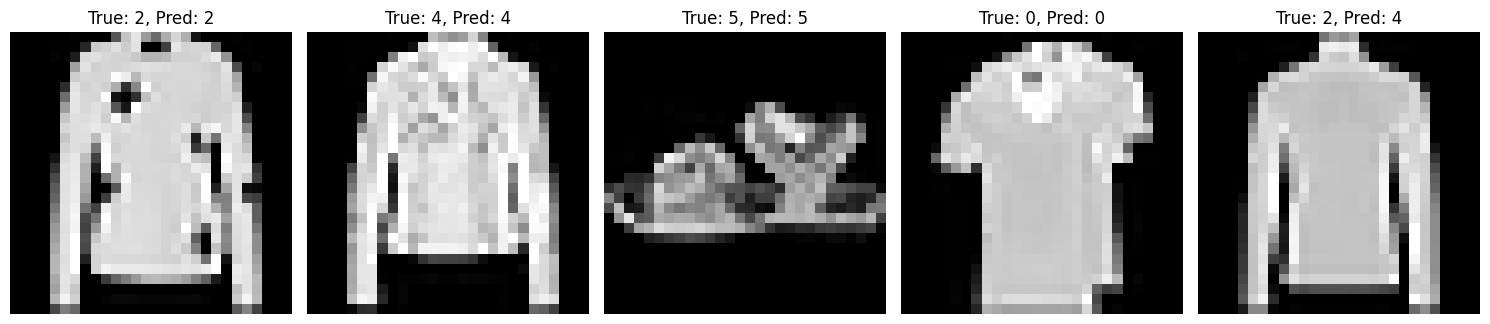

In [10]:
# Task: Use model.predict() and display predictions
# Your code here to display images with predicted and actual labels
predictions = model.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)

import random
plt.figure(figsize=(15, 8))

for i in range(5):
    index = random.randint(0, len(x_test) - 1)
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[index]}, Pred: {predicted_classes[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Construct a confusion matrix to visualize how well your model performed across different classes.

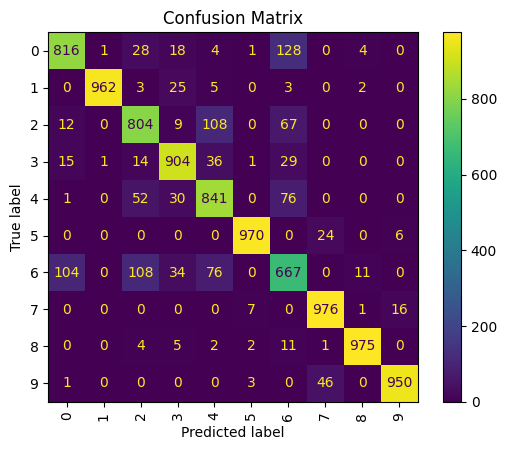

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Task: Create predictions and a confusion matrix
# Your code here

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Display the confusion matrix
# Your code here
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=range(10))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()